In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
msa=pd.read_excel('/Users/michaelrosen/Desktop/AMB/MSA_clean.xlsx')

In [99]:
msa['VMT_per_capita']=(msa['TOTAL (VMT)']*1000*365)/msa['CENSUS POPULATION']

In [100]:
msa['LM_per_capita']=msa['TOTAL (LM)']/msa['CENSUS POPULATION']

In [101]:
msa['ALL FREEWAYS (LM)']=msa['INTERSTATE MILES (LM)']+msa['FREEWAYS (LM)']+msa['OTHER PRINCIPAL ARTERIAL (LM)']+msa['MINOR ARTERIAL (LM)']

In [102]:
msa['ALL_FREEWAYS_LM_per_capita']=msa['ALL FREEWAYS (LM)']/msa['CENSUS POPULATION']

In [103]:
a=msa['LM_per_capita']
e=msa['VMT_per_capita']
c=np.array(msa['LM_per_capita'])
d=np.array(msa['VMT_per_capita'])
m, b = np.polyfit(c, d, 1)

Text(10, -5, 'New York, NY')

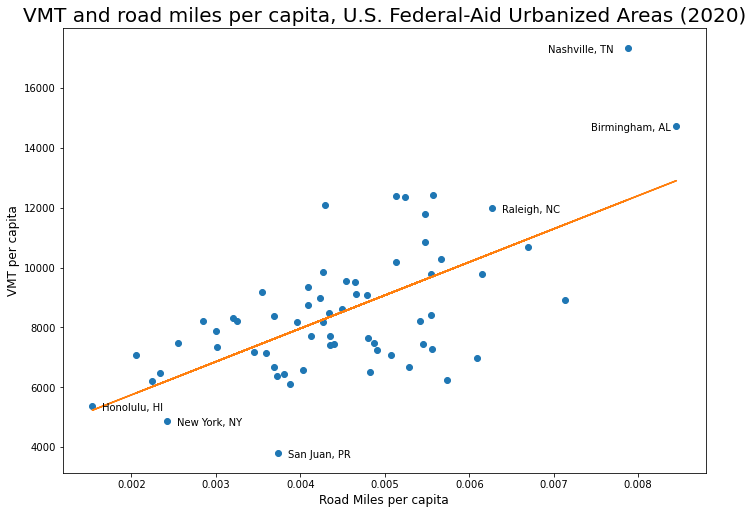

In [104]:
msa.plot(
    x=['LM_per_capita'], 
    y=['VMT_per_capita'], 
    kind='scatter', 
    figsize=(10, 8),
    c='cornflowerblue',
)
                
plt.plot(a,e,'o')
plt.plot(c, m*c + b)
plt.title(label="VMT and road miles per capita, U.S. Federal-Aid Urbanized Areas (2020)",
          fontsize=20,
          color="black",)
plt.xlabel('Road Miles per capita', fontsize=12)
plt.ylabel('VMT per capita', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.annotate('Nashville, TN', xy =(0.007876, 17319.163740), textcoords="offset points", xytext=(-80,-5))
plt.annotate('Birmingham, AL', xy =(0.008452, 14713.841737), textcoords="offset points", xytext=(-85,-5))
plt.annotate('Raleigh, NC', xy =(0.006266, 12001.433658), textcoords="offset points", xytext=(10,-5))

plt.annotate('San Juan, PR', xy =(0.003739, 3822.872022), textcoords="offset points", xytext=(10,-5))
plt.annotate('Honolulu, HI', xy =(0.001536, 5392.773193), textcoords="offset points", xytext=(10,-5))
plt.annotate('New York, NY', xy =(0.002420, 4891.236752), textcoords="offset points", xytext=(10,-5))



In [105]:
msaold=pd.read_excel('/Users/michaelrosen/Desktop/AMB/MSAs_1995.xlsx')

In [106]:
msaold['VMT_per_capita']=(msaold['TOTAL (VMT)']*1000*365)/msaold['CENSUS POPULATION']

In [107]:
msaold['LM_per_capita']=msaold['TOTAL (LM)']/msa['CENSUS POPULATION']

Text(0, 0.5, 'VMT per capita')

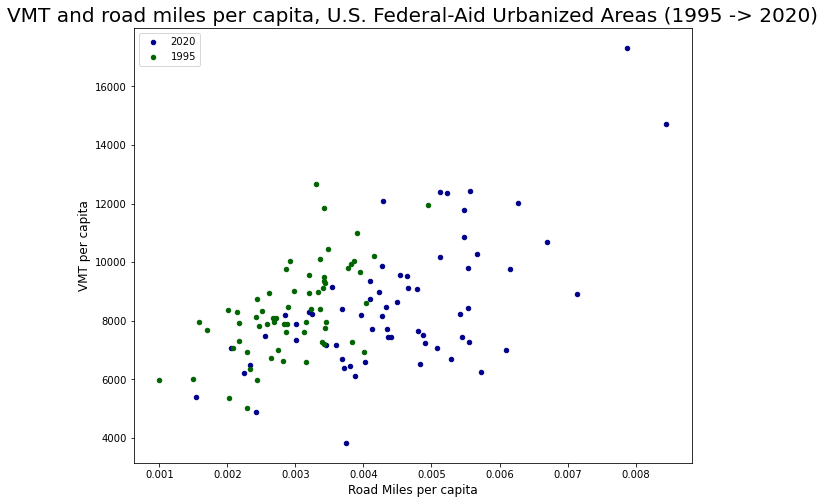

In [108]:
ax = msa.plot(kind='scatter', x=['LM_per_capita'], y=['VMT_per_capita'], color='DarkBlue', figsize=(10,8), label='2020')
msaold.plot(kind='scatter', x=['LM_per_capita'], y=['VMT_per_capita'], color='DarkGreen', label='1995', ax=ax)
plt.title(label="VMT and road miles per capita, U.S. Federal-Aid Urbanized Areas (1995 -> 2020)",
          fontsize=20,
          color="black",)
plt.xlabel('Road Miles per capita', fontsize=12)
plt.ylabel('VMT per capita', fontsize=12)

Text(0, 0.5, 'VMT')

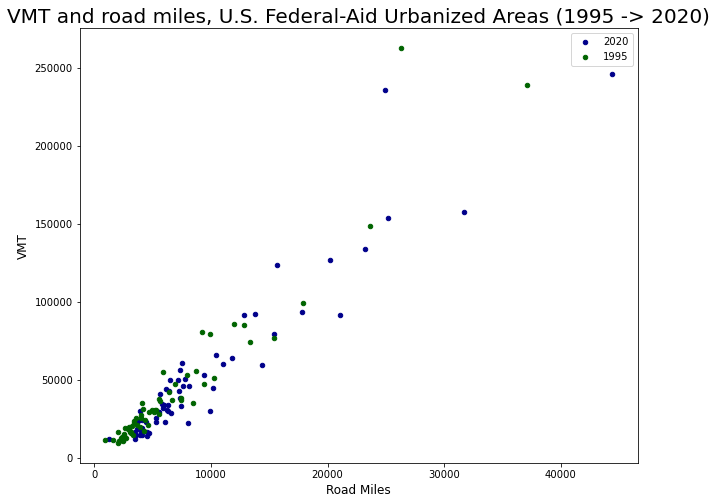

In [109]:
ax = msa.plot(kind='scatter', x=['TOTAL (LM)'], y=['TOTAL (VMT)'], color='DarkBlue', figsize=(10,8), label='2020')
msaold.plot(kind='scatter', x=['TOTAL (LM)'], y=['TOTAL (VMT)'], color='DarkGreen', label='1995', ax=ax)
plt.title(label="VMT and road miles, U.S. Federal-Aid Urbanized Areas (1995 -> 2020)",
          fontsize=20,
          color="black",)
plt.xlabel('Road Miles', fontsize=12)
plt.ylabel('VMT', fontsize=12)

In [110]:
msa_1995=pd.read_excel('/Users/michaelrosen/Desktop/AMB/msa_selected_1995.xlsx')
msa_2019=pd.read_excel('/Users/michaelrosen/Desktop/AMB/msa_selected_2019.xlsx')

In [111]:
msajoin=msa_1995.merge(msa_2019,how='inner',on='ID')

In [112]:
msajoin['LMgrowth']=(msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_y']-msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_x'])/(msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_x'])

In [113]:
msajoin['PREDICTED_VMT']=msajoin['TOTAL FREEWAY DVMT (1,000)_x']*((1+msajoin['LMgrowth'])*1.03)

In [114]:
aa=msajoin['TOTAL FREEWAY DVMT (1,000)_y']
ee=msajoin['PREDICTED_VMT']
cc=np.array(msajoin['TOTAL FREEWAY DVMT (1,000)_y'])
dd=np.array(msajoin['PREDICTED_VMT'])
mm, bb = np.polyfit(cc, dd, 1)

Text(0, 0.5, 'Predicted VMT')

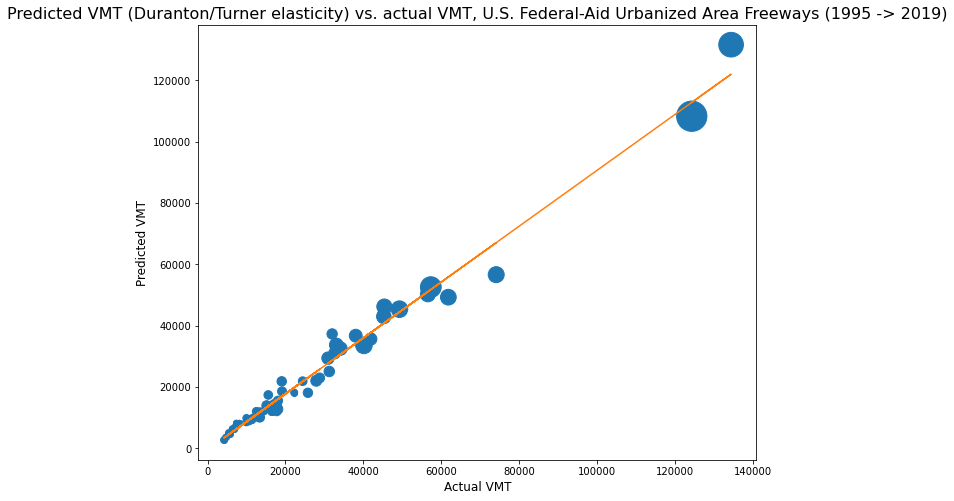

In [115]:
msajoin.plot(kind='scatter', x=['TOTAL FREEWAY DVMT (1,000)_y'], y=['PREDICTED_VMT'],figsize=(10,8),s=(msajoin['ESTIMATED POPULATION (1,000)_y']*0.00005))
plt.plot(aa,ee,'o')
plt.plot(cc, mm*cc + bb)
plt.title(label="Predicted VMT (Duranton/Turner elasticity) vs. actual VMT, U.S. Federal-Aid Urbanized Area Freeways (1995 -> 2019)",
          fontsize=16,
          color="black",)
plt.xlabel('Actual VMT', fontsize=12)
plt.ylabel('Predicted VMT', fontsize=12)


In [116]:
msa_nolaorny=msajoin.iloc[2:]

<AxesSubplot:xlabel='[TOTAL FREEWAY DVMT (1,000)_y]', ylabel='[PREDICTED_VMT]'>

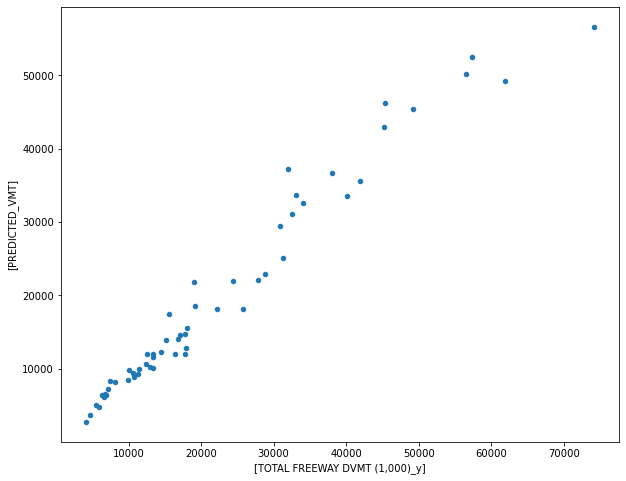

In [117]:
msa_nolaorny.plot(kind='scatter', x=['TOTAL FREEWAY DVMT (1,000)_y'], y=['PREDICTED_VMT'],figsize=(10,8))